In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd

In [86]:
patient_df = pd.read_csv("datasets/data.csv")

In [87]:
patient_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [88]:
patient_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [89]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [90]:
patient_df.drop(["Unnamed: 32", "id"], inplace=True, axis=1)

In [91]:
# Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
sns.heatmap?

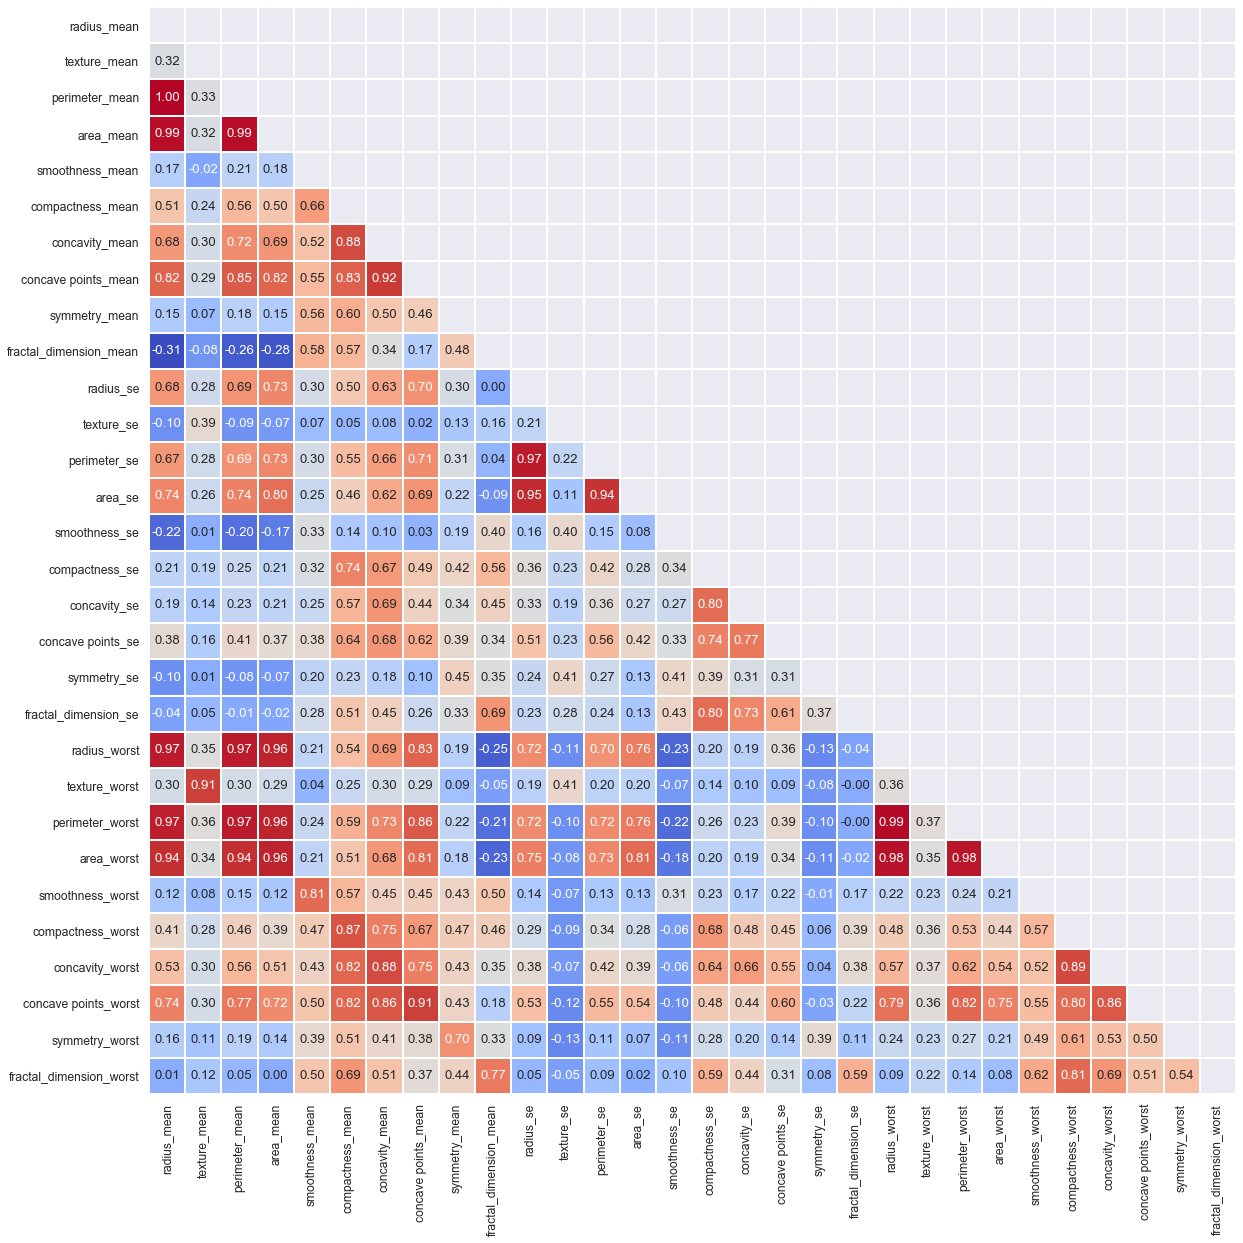

In [93]:
# Check correlations
correlations_df = patient_df.corr()

# Set font size
sns.set(font_scale=1.1)

# Set figure size
plt.figure(figsize=(20, 20))

# Define a mask to show only the upper triangular matrix
mask = np.triu(correlations_df)

# Show a heat map to visualize correlations
sns.heatmap(correlations_df,
            cmap="coolwarm",
            annot=True,
            fmt=".2f",
            linewidths=1,
            mask=mask,
            cbar=False,
            square=True)

# Show the map
plt.show()

In [94]:
columns = ["fractal_dimension_worst", "symmetry_worst", "texture_worst", "fractal_dimension_se", "symmetry_se",
           "texture_mean", "smoothness_mean", "texture_worst", "smoothness_worst", "symmetry_mean", "fractional_dimension_mean",
           "smoothness_se", "compactness_se", "concavity_se", "concave points_se"]

patient_df.drop(columns, axis=1, inplace=True)

In [ ]:
correlations_df

In [ ]:
# Work on categorical features
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

categorical_features = (patient_df.select_dtypes(include=["object"])).columns

# Convert categorical features to encoded numerical features
patient_df[categorical_features] = encoder.fit_transform(patient_df[categorical_features])

In [ ]:
# Separate features from labels
y = patient_df["diagnosis"]

X = patient_df.drop("diagnosis", axis=1)

In [ ]:
# Split train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)

## Models

In [ ]:
# For metrics, get accuracy_score
from sklearn.metrics import accuracy_score

### 1. KNeighbors Classifier

In [95]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_list = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_s = knn.predict(X_test)
    scores = accuracy_score(y_test, pred_s)
    accuracy_list.append(scores)

In [96]:
# Print the maximum accuracy
max(accuracy_list)

0.9649122807017544

### 2. Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

preds = log_reg.predict(X_test)
score = accuracy_score(y_test, preds)

In [98]:
# Print accuracy
score

0.9473684210526315

### 3. Random Forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier

rand_for = RandomForestClassifier()
rand_for.fit(X_train, y_train)

preds = rand_for.predict(X_test)
score = accuracy_score(y_test, preds)

In [100]:
# Print accuracy
score

0.956140350877193

### 4. Gradient Boosting Classifier

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred_3=gbc.predict(X_test)
score_3=accuracy_score(y_test,pred_3)

In [102]:
score_3

0.956140350877193